In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1 **Frame the problem and look at the big picture**<br>
Unsure of we need to write anything about this or if all is written in the report

2 **Get the data**<br>
Importing the dataset

In [3]:
datasetTrain = pd.read_csv('train.csv')
datasetTest = pd.read_csv('test.csv')

3 **Explore and visualize the data to gain insights**

In [4]:
datasetTrain.info()
datasetTest.info()
print('-----------------')
print(datasetTest.head())
print('-----------------')
print(datasetTrain.head())
print('-----------------')
print(datasetTrain.describe())
print('-----------------')
print(datasetTest.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

See missing values

In [5]:
print('Missing values-----------------')
print(datasetTrain.isnull().sum())
print('-----------------')
print(datasetTest.isnull().sum())

Missing values-----------------
id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64
-----------------
id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overvie

Drop belongs_to_collection because most of the values are null

In [6]:
datasetTrain = datasetTrain.drop(['belongs_to_collection'], axis=1)
datasetTest = datasetTest.drop(['belongs_to_collection'], axis=1)

Drop homepage because most of the values are null

In [7]:
datasetTrain = datasetTrain.drop(['homepage'], axis=1)
datasetTest = datasetTest.drop(['homepage'], axis=1)
print(datasetTest[datasetTest['release_date'].isnull()])

       id  budget                         genres    imdb_id original_language  \
828  3829       0  [{'id': 18, 'name': 'Drama'}]  tt0210130                en   

                 original_title  \
828  Jails, Hospitals & Hip-Hop   

                                              overview  popularity  \
828  Jails, Hospitals &amp; Hip-Hop is a cinematic ...    0.009057   

    poster_path production_companies production_countries release_date  \
828         NaN                  NaN                  NaN          NaN   

     runtime spoken_languages status  \
828     90.0              NaN    NaN   

                                               tagline  \
828  three worlds / two million voices / one genera...   

                          title Keywords cast crew  
828  Jails, Hospitals & Hip-Hop      NaN   []  NaN  


The release date of the movie with id 3829 is missing, after an internet search we found that the release date is<br>
05/01/2000<br>
We replace the missing value with the correct one

In [8]:
datasetTest.loc[datasetTest['release_date'].isnull(), 'release_date'] = '05/01/00'
print(datasetTest[datasetTest["release_date"] == '5/1/00'])

        id     budget                                             genres  \
1731  4732  103000000  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   

        imdb_id original_language original_title  \
1731  tt0172495                en      Gladiator   

                                               overview  popularity  \
1731  In the year 180, the death of emperor Marcus A...   23.186667   

                           poster_path  \
1731  /6WBIzCgmDCYrqh64yDREGeDk9d3.jpg   

                                   production_companies  \
1731  [{'name': 'DreamWorks SKG', 'id': 27}, {'name'...   

                                   production_countries release_date  runtime  \
1731  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...       5/1/00    155.0   

                              spoken_languages    status            tagline  \
1731  [{'iso_639_1': 'en', 'name': 'English'}]  Released  A Hero Will Rise.   

          title                                           Keywords  \
173

For nominal data (strings), we replace the missing values with "unknown"

In [9]:
datasetTrain[['genres',
              'original_language',
              'production_companies',
              'production_countries',
              'status',
              'cast',
              'crew',
              'spoken_languages',
              ]] = datasetTrain[['genres',
                                 'original_language',
                                 'production_companies',
                                 'production_countries',
                                 'status',
                                 'cast',
                                 'crew',
                                 'spoken_languages',
                                 ]].fillna('unknown')
datasetTest[['genres',
             'original_language',
             'production_companies',
             'production_countries',
             'status',
             'cast',
             'crew',
             'spoken_languages',
             ]] = datasetTest[['genres',
                               'original_language',
                               'production_companies',
                               'production_countries',
                               'status',
                               'cast',
                               'crew',
                               'spoken_languages',
                               ]].fillna('unknown')

For numerical data, we replace the missing values with the mean

In [10]:
datasetTrain['runtime'] = datasetTrain['runtime'].fillna(datasetTrain['runtime'].mean())
datasetTest['runtime'] = datasetTest['runtime'].fillna(datasetTest['runtime'].mean())
print(datasetTrain['runtime'].isnull().any())
print(datasetTest['runtime'].isnull().any())

False
False


We check if there are still missing values

In [11]:
print('Missing values-----------------')
print(datasetTrain.isnull().sum())
print('-----------------')
print(datasetTest.isnull().sum())

Missing values-----------------
id                        0
budget                    0
genres                    0
imdb_id                   0
original_language         0
original_title            0
overview                  8
popularity                0
poster_path               1
production_companies      0
production_countries      0
release_date              0
runtime                   0
spoken_languages          0
status                    0
tagline                 597
title                     0
Keywords                276
cast                      0
crew                      0
revenue                   0
dtype: int64
-----------------
id                        0
budget                    0
genres                    0
imdb_id                   0
original_language         0
original_title            0
overview                 14
popularity                0
poster_path               1
production_companies      0
production_countries      0
release_date              0
runtime      

We need to convert the release_date column to datetime

In [12]:
datasetTrain['release_date'] = pd.to_datetime(datasetTrain['release_date'])
datasetTest['release_date'] = pd.to_datetime(datasetTest['release_date'])

We create a new column with the year, month and day of the release date

In [13]:
datasetTrain['release_year'] = pd.to_datetime(datasetTrain['release_date']).dt.year.astype(int)
datasetTrain['release_month'] = pd.to_datetime(datasetTrain['release_date']).dt.month.astype(int)
datasetTrain['release_day'] = pd.to_datetime(datasetTrain['release_date']).dt.day.astype(int)
datasetTest['release_year'] = pd.to_datetime(datasetTest['release_date']).dt.year.astype(int)
datasetTest['release_month'] = pd.to_datetime(datasetTest['release_date']).dt.month.astype(int)
datasetTest['release_day'] = pd.to_datetime(datasetTest['release_date']).dt.day.astype(int)

We drop the release_date column since we don't need it anymore

In [14]:
datasetTrain = datasetTrain.drop(['release_date'], axis=1)
datasetTest = datasetTest.drop(['release_date'], axis=1)

Considering the competition was in 2019, there should not be any movies with a release date after 2019

In [15]:
print(datasetTrain['release_year'].max())
print(datasetTest['release_year'].max())

2071
2071


We can see that quite a few movies have a release year after 2019, seems like these movies were released in the<br>
1900s but a mistake has swapped 19 with 20 so that a movie released in 1971 is registered as 2071<br>
Fixing the release year

In [16]:
def fix_release_year(year):
    if year > 2019:
        return year - 100
    else:
        return year

In [17]:
datasetTrain['release_year'] = datasetTrain['release_year'].apply(lambda x: fix_release_year(x))
datasetTest['release_year'] = datasetTest['release_year'].apply(lambda x: fix_release_year(x))

**Analyzing the data**

Visualizing the budget

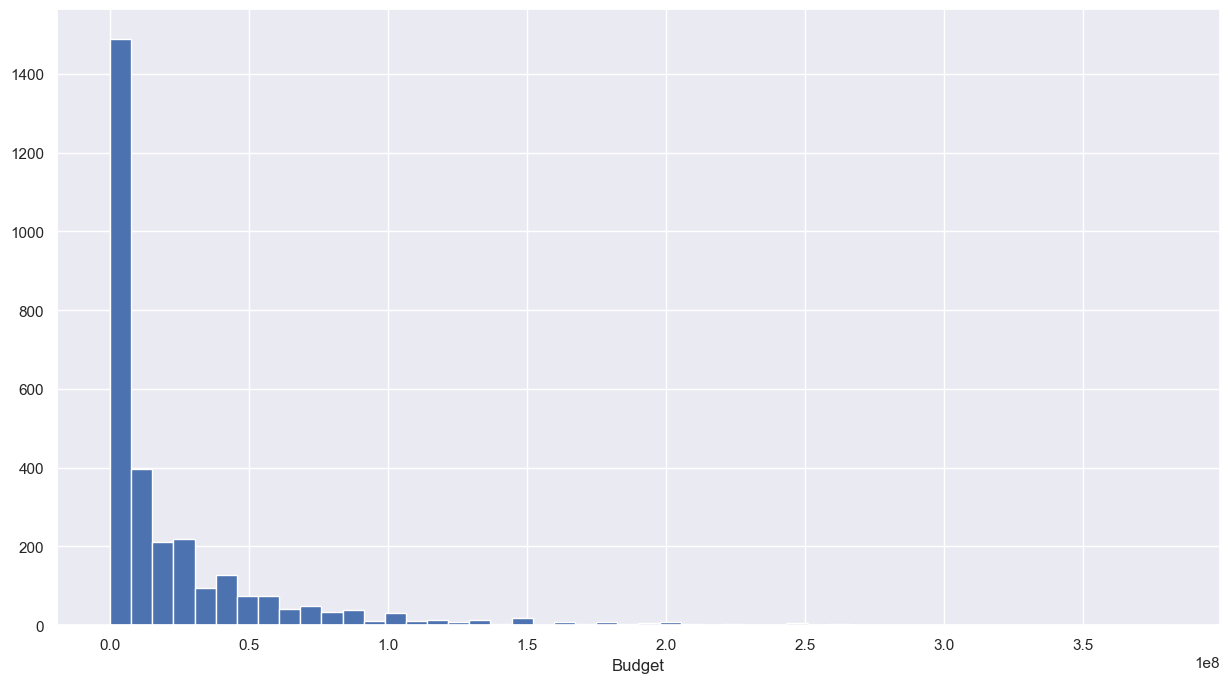

In [18]:
sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel('Budget')
plt.hist(datasetTrain['budget'], bins=50)
plt.show()

From the plot we can see that most of the movies have low budget

Display the relation between budget and revenue

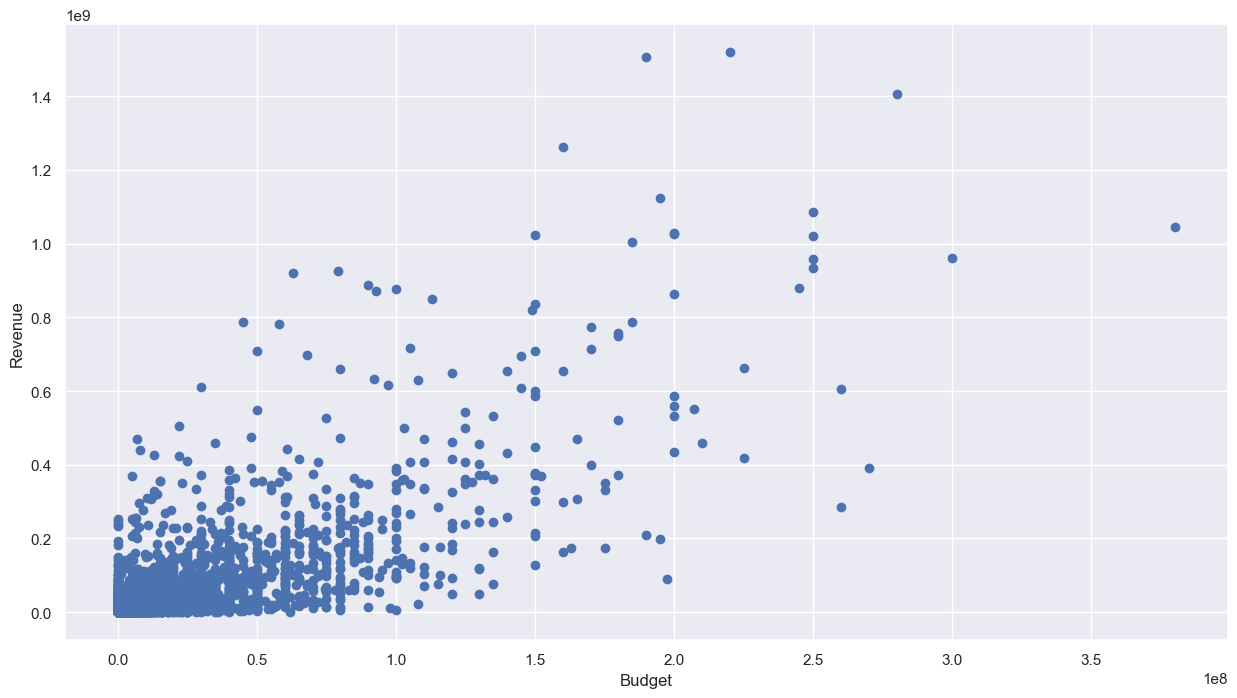

In [19]:
sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.scatter(datasetTrain['budget'], datasetTrain['revenue'])
plt.show()

From the plot we can see that there is a positive correlation between budget and revenue

Display the relation between budget and popularity

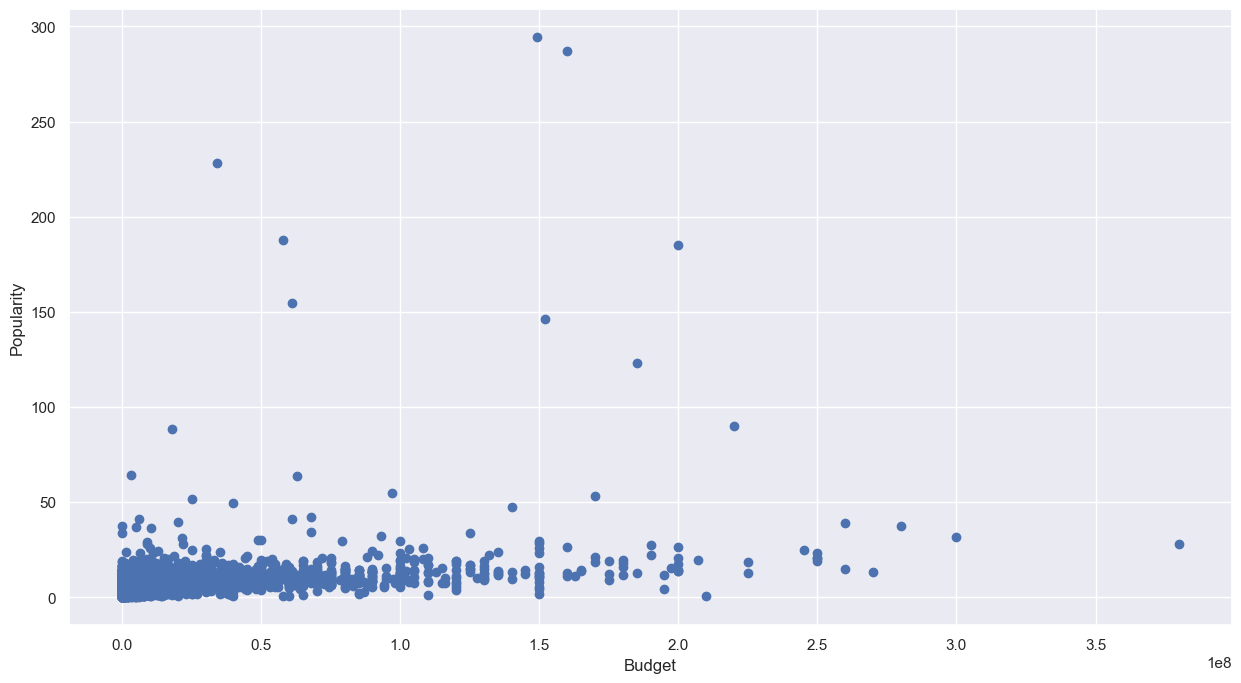

In [20]:
sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.scatter(datasetTrain['budget'], datasetTrain['popularity'])
plt.show()

Correlation matrix

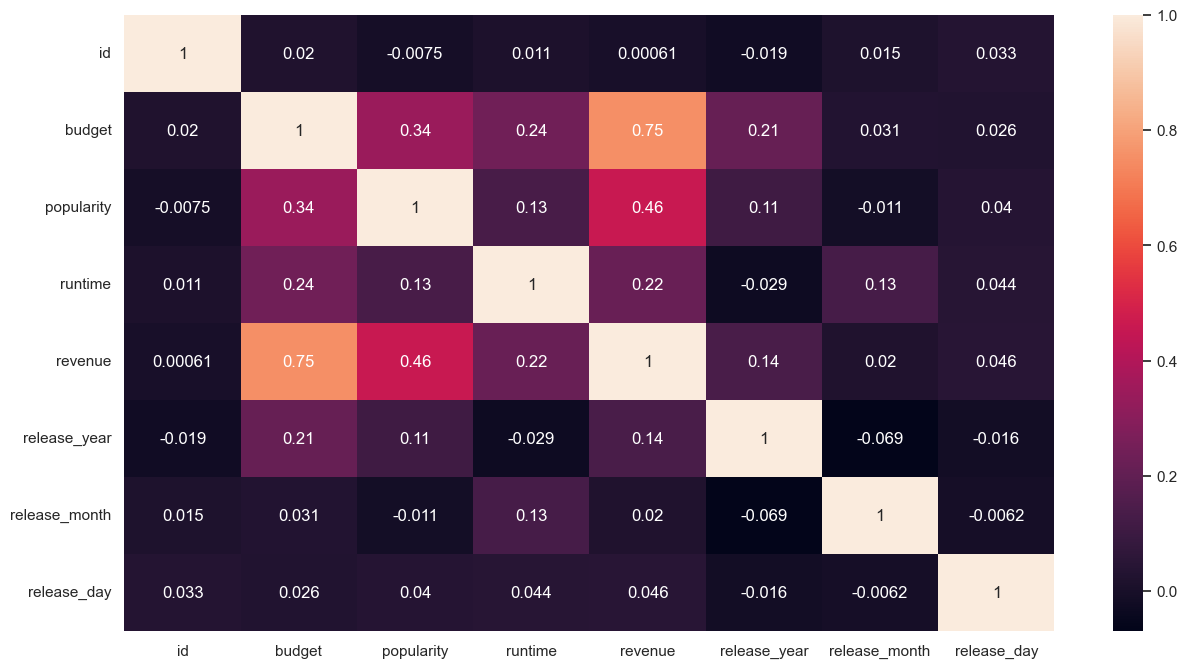

In [21]:
corrMatrix = datasetTrain.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

 From the correlation matrix we can see that there is a high positive<br>
 correlation between budget and revenue, there is also a high positive correlation between popularity and revenue,<br>
 lastly there is a positive correlation between runtime and revenue<br>
 Visualizing these correlations

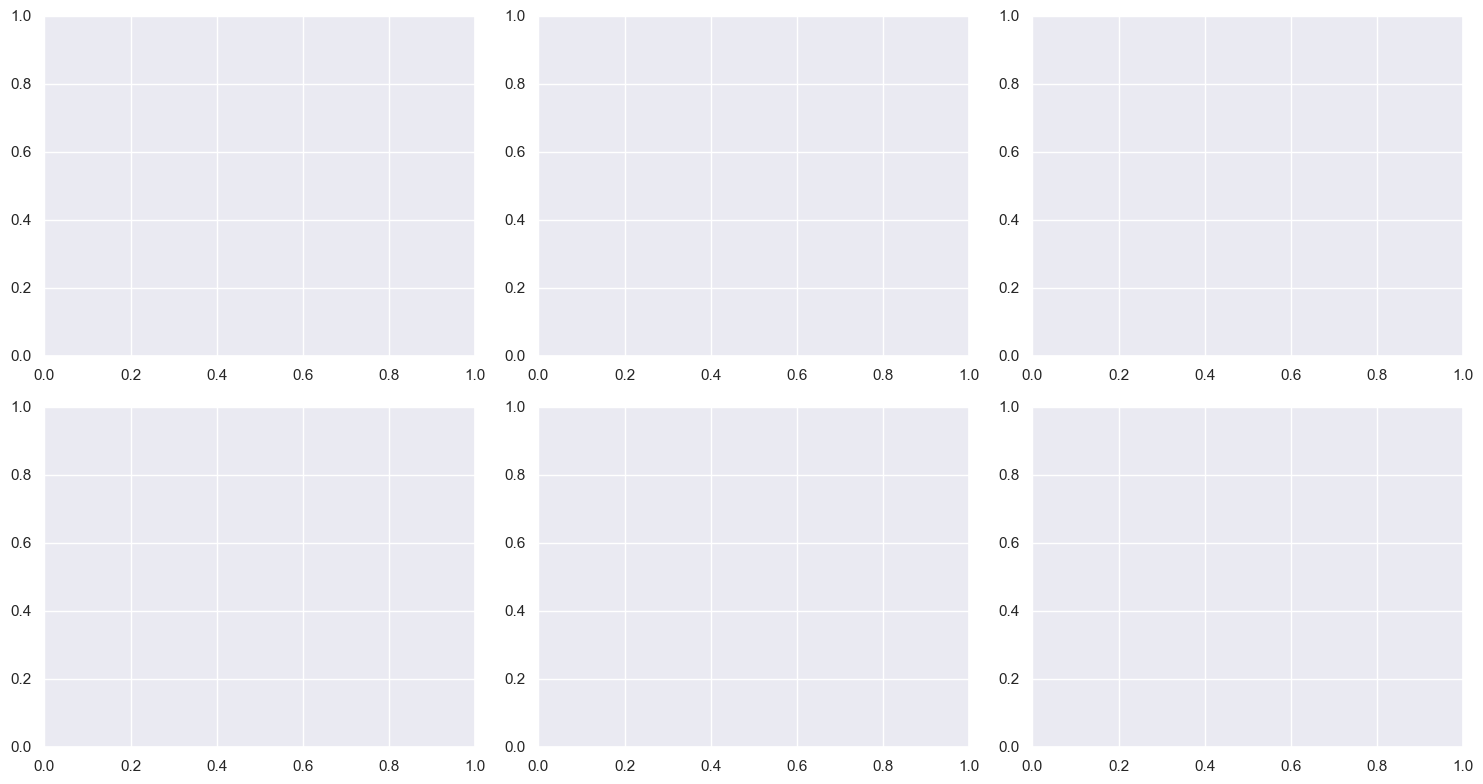

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8), tight_layout=True)

In [23]:
datasetTrain.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel='Revenue', color='red').set_title(
    'Budget vs Revenue')
datasetTrain.plot(ax=ax[0][1], x='popularity', y='revenue', style='o', ylabel='Revenue', color='green').set_title(
    'Popularity vs Revenue')
datasetTrain.plot(ax=ax[0][2], x='runtime', y='revenue', style='o', ylabel='Revenue', color='blue').set_title(
    'Runtime vs Revenue')
datasetTrain.plot(ax=ax[1][0], x='budget', y='popularity', style='o', ylabel='Popularity', color='orange').set_title(
    'Budget vs Popularity')
datasetTrain.plot(ax=ax[1][1], x='budget', y='runtime', style='o', ylabel='Runtime', color='purple').set_title(
    'Budget vs Runtime')
datasetTrain.plot(ax=ax[1][2], x='popularity', y='runtime', style='o', ylabel='Runtime', color='brown').set_title(
    'Popularity vs Runtime')
plt.show()

Visualizing the change in revenue, runtime, popularity and budget over the years

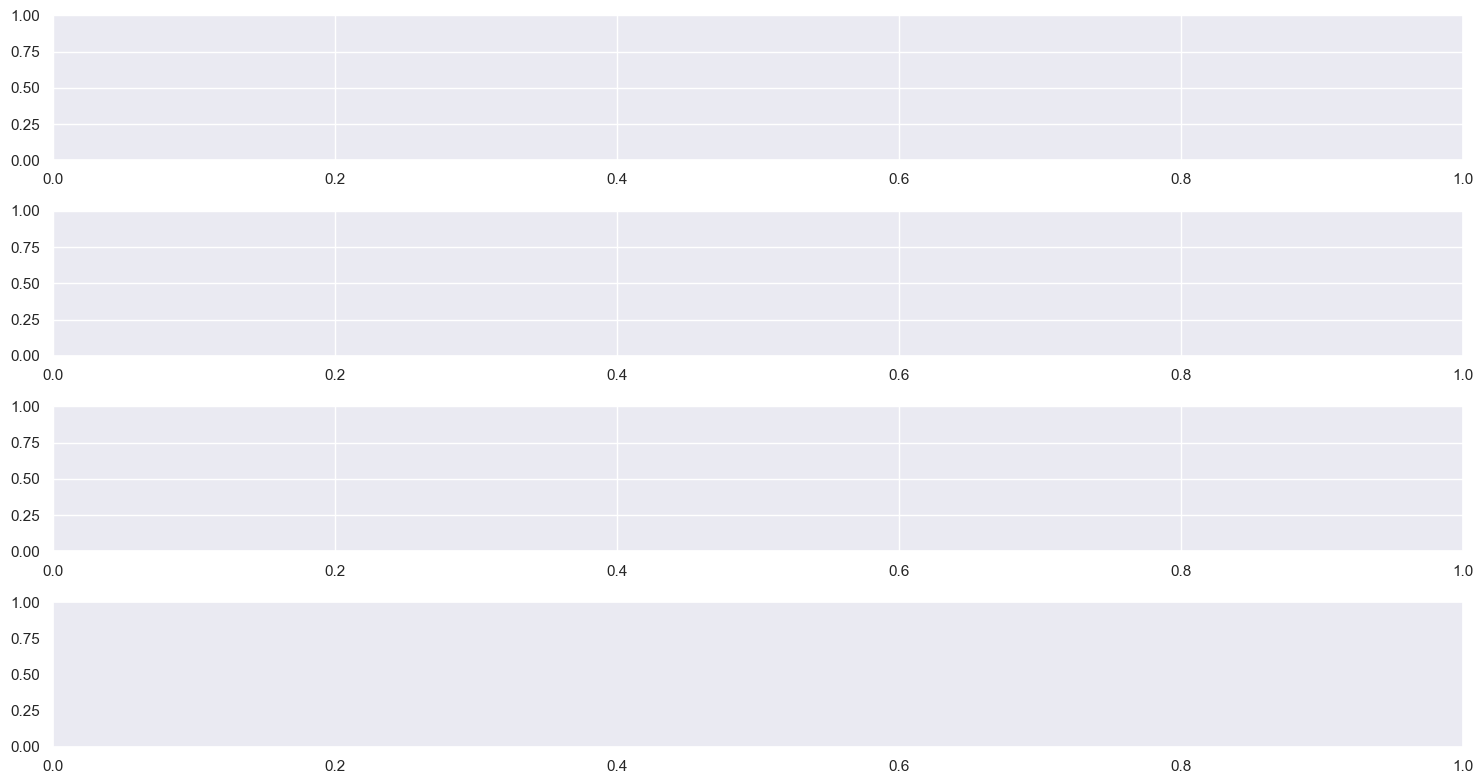

In [24]:
fig, ax = plt.subplots(4, 1, tight_layout=True)
plt.grid()

In [25]:
datasetTrain.groupby('release_year')['revenue'].mean().plot(ax=ax[0], figsize=(10, 10), linewidth=3, color='red').set_title('Revenue over the years')
datasetTrain.groupby('release_year')['runtime'].mean().plot(ax=ax[1], figsize=(10, 10), linewidth=3, color='green').set_title('Runtime over the years')
datasetTrain.groupby('release_year')['popularity'].mean().plot(ax=ax[2], figsize=(10, 10), linewidth=3, color='blue').set_title('Popularity over the years')
datasetTrain.groupby('release_year')['budget'].mean().plot(ax=ax[3], figsize=(10, 10), linewidth=3, color='orange').set_title('Budget over the years')
plt.show()

TODO - Comment on the plots and their correlations

In [26]:
print(len(datasetTrain[datasetTrain['budget'] < 10000]))

835


We can see that there are 835 out of 300 movies that have a budget under 10000, TODO - do something with these<br>
 TODO - maybe some more exploration and visualization<br>
 4 **Prepare the data for Machine Learning algorithms**<br>
  TODO - Prepare the data for Machine Learning algorithms TODO - Genres, cast, spoken_languages and crew in JSON<br>
   TODO cont -format, convert to nominal values.  These columns could be used to create new features such as the<br>
    number of genres, number of cast members, number of spoken languages, number of crew members, etc.

5 **Explore many different models and shortlist the best ones**<br>
TODO - Explore many different models and shortlist the best ones

6 **Fine-tune your models and combine them into a great solution**<br>
TODO - Fine-tune your models and combine them into a great solution

7 **Present your solution**<br>
TODO - Present your solution

8 **Launch, monitor, and maintain your system**<br>
TODO - Launch, monitor, and maintain your system